An automotive service chain is launching it's new grand service station this weekend. They offer to service a variety of cars. The current capacity of the station is to check 315 cars thouroughly per day. As an inaugral offer, they claim to freely check all cars that arrive on their launch day and report whether serviving or not. Unexpectedly they got 450 cars. 
Can you save the new service station set?

In [17]:
library(class)
library(caret)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [19]:
serviceTrain= read.csv("/kaggle/input/service-by-ts/serviceTrainData.csv")
serviceTest = read.csv("/kaggle/input/service-by-ts/serviceTestData.csv")

In [20]:
head(serviceTrain)

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,103.388821,103.504032,103.051485,106.172658,105.686843,No
2,26.765516,26.188265,31.259536,29.186162,31.311275,Yes
3,62.413282,63.681061,59.720883,64.704031,58.620518,Yes
4,45.533338,49.906615,48.777581,48.113851,47.952072,No
5,104.388821,103.284032,103.051485,105.822658,106.536843,No
6,4.987185,4.941003,3.588986,8.363161,1.280262,No


In [21]:
head(serviceTest)

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,45.773338,49.936615,49.777581,48.263851,50.952072,No
2,4.987185,7.891003,6.588986,9.493161,3.240262,No
3,4.987185,4.891003,7.308986,8.373161,2.780262,No
4,106.388821,104.454032,103.051485,106.282658,105.536843,No
5,104.388821,103.744032,103.051485,106.132658,105.776843,No
6,4.987185,4.891003,5.618986,8.373161,1.760262,No


In [22]:
summary(serviceTrain)

    OilQual           EnginePerf       NormMileage         TyreWear      
 Min.   :  0.9872   Min.   :  1.891   Min.   :  3.359   Min.   :  6.213  
 1st Qu.: 26.7655   1st Qu.: 27.418   1st Qu.: 31.260   1st Qu.: 29.036  
 Median : 59.6633   Median : 59.741   Median : 57.221   Median : 60.304  
 Mean   : 59.6493   Mean   : 60.306   Mean   : 60.297   Mean   : 61.759  
 3rd Qu.:104.3888   3rd Qu.:103.744   3rd Qu.:103.051   3rd Qu.:106.173  
 Max.   :106.4288   Max.   :105.744   Max.   :105.051   Max.   :108.173  
    HVACwear        Service         
 Min.   : -1.72   Length:315        
 1st Qu.: 31.34   Class :character  
 Median : 60.62   Mode  :character  
 Mean   : 60.39                     
 3rd Qu.:105.54                     
 Max.   :107.54                     

In [23]:
str(serviceTrain)

'data.frame':	315 obs. of  6 variables:
 $ OilQual    : num  103.4 26.8 62.4 45.5 104.4 ...
 $ EnginePerf : num  103.5 26.2 63.7 49.9 103.3 ...
 $ NormMileage: num  103.1 31.3 59.7 48.8 103.1 ...
 $ TyreWear   : num  106.2 29.2 64.7 48.1 105.8 ...
 $ HVACwear   : num  105.7 31.3 58.6 48 106.5 ...
 $ Service    : chr  "No" "Yes" "Yes" "No" ...


In [24]:
predictKnn = knn(train = serviceTrain[,-6], test = serviceTest[,-6], cl = serviceTrain$Service, k =3 )

In [25]:
predictKnn

[1] No  No  No  No  No  No  No  Yes Yes No  No  No  No  No  No  No  Yes No 
 [19] No  Yes Yes No  Yes No  No  No  No  No  No  No  No  No  No  No  No  Yes
 [37] No  No  No  No  No  Yes No  Yes No  No  No  Yes Yes No  Yes No  Yes No 
 [55] No  No  No  No  No  No  No  No  No  No  Yes Yes Yes No  Yes No  No  Yes
 [73] No  No  No  No  No  No  Yes Yes Yes Yes No  Yes No  No  Yes Yes Yes No 
 [91] No  No  Yes No  Yes No  No  No  No  No  No  No  No  No  No  Yes No  No 
[109] No  No  No  Yes No  Yes No  Yes Yes No  Yes No  No  No  No  No  Yes No 
[127] No  No  No  No  No  No  Yes No  No 
Levels: No Yes

In [27]:
confusionMatrix = table(predictKnn, serviceTest[,6])
confusionMatrix

          
predictKnn No Yes
       No  99   0
       Yes  0  36

In [29]:
knn_accuracy = sum(diag(confusionMatrix))/nrow(serviceTest)
knn_accuracy

[1] 1

# Case Study 2: Uber Driver 

An uber cab driver has attended 91 trips in a week. He has a facility which continuosly monitors the following parameters for each trip. 
Uber wants to group trips in to certain number of categories based on the details collected during the trip for some business plan. Mr.Sam, data scientist to perform this job and the details of trips are shared in a ".csv" format file with name "tripDetails.csv"

In [31]:
df = read.csv("/kaggle/input/tripdetails/tripDetails.csv")

In [34]:
str(df)

'data.frame':	91 obs. of  8 variables:
 $ TripID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ TripLength   : int  21 148 18 22 183 18 20 21 181 174 ...
 $ MaxSpeed     : int  51 130 38 43 108 43 37 38 99 100 ...
 $ MostFreqSpeed: int  14 106 16 48 90 13 15 14 108 92 ...
 $ TripDuration : int  93 156 100 36 171 64 85 69 155 133 ...
 $ Brakes       : int  307 226 351 17 88 136 121 114 86 106 ...
 $ IdlingTime   : int  27 5 26 4 5 25 26 25 5 5 ...
 $ Honking      : int  112 114 107 5 29 21 23 20 25 34 ...


In [32]:
head(df)

,TripID,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,21,51,14,93,307,27,112
2,2,148,130,106,156,226,5,114
3,3,18,38,16,100,351,26,107
4,4,22,43,48,36,17,4,5
5,5,183,108,90,171,88,5,29
6,6,18,43,13,64,136,25,21


In [33]:
summary(df)

     TripID       TripLength        MaxSpeed      MostFreqSpeed   
 Min.   : 1.0   Min.   : 16.00   Min.   : 35.00   Min.   : 12.00  
 1st Qu.:23.5   1st Qu.: 20.00   1st Qu.: 42.00   1st Qu.: 15.50  
 Median :46.0   Median : 21.00   Median : 54.00   Median : 42.00  
 Mean   :46.0   Mean   : 70.77   Mean   : 70.36   Mean   : 50.65  
 3rd Qu.:68.5   3rd Qu.:163.00   3rd Qu.:105.50   3rd Qu.: 89.00  
 Max.   :91.0   Max.   :210.00   Max.   :138.00   Max.   :118.00  
  TripDuration        Brakes        IdlingTime       Honking      
 Min.   : 22.00   Min.   : 14.0   Min.   : 4.00   Min.   :  4.00  
 1st Qu.: 34.50   1st Qu.: 36.5   1st Qu.: 5.00   1st Qu.: 20.00  
 Median : 88.00   Median :100.0   Median : 5.00   Median : 25.00  
 Mean   : 87.37   Mean   :135.4   Mean   :11.59   Mean   : 49.92  
 3rd Qu.:133.00   3rd Qu.:198.0   3rd Qu.:24.00   3rd Qu.: 97.50  
 Max.   :171.00   Max.   :429.0   Max.   :32.00   Max.   :155.00  

In [37]:
cluster = kmeans(df,3)
cluster

K-means clustering with 3 clusters of sizes 15, 46, 30

Cluster means:
    TripID TripLength  MaxSpeed MostFreqSpeed TripDuration    Brakes IdlingTime
1 39.40000   20.26667  45.06667      14.46667     88.73333 350.13333  25.400000
2 46.34783   19.91304  48.21739      32.82609     50.13043  59.93478  11.413043
3 48.76667  174.00000 116.96667      96.06667    143.80000 143.86667   4.966667
   Honking
1 97.73333
2 15.60870
3 78.63333

Clustering vector:
 [1] 1 3 1 2 3 2 2 2 3 3 3 2 1 2 2 3 2 2 1 2 3 2 1 1 1 2 2 1 3 3 2 2 2 3 2 3 3 3
[39] 2 1 3 2 2 2 3 2 1 2 3 2 2 2 2 2 1 3 2 2 3 2 2 2 3 3 1 2 2 2 3 2 2 1 2 2 2 3
[77] 3 3 2 2 3 3 3 3 2 2 1 3 1 3 2

Within cluster sum of squares by cluster:
[1]  37488.4 188038.7 217748.4
 (between_SS / total_SS =  81.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Determining K using the elbow method

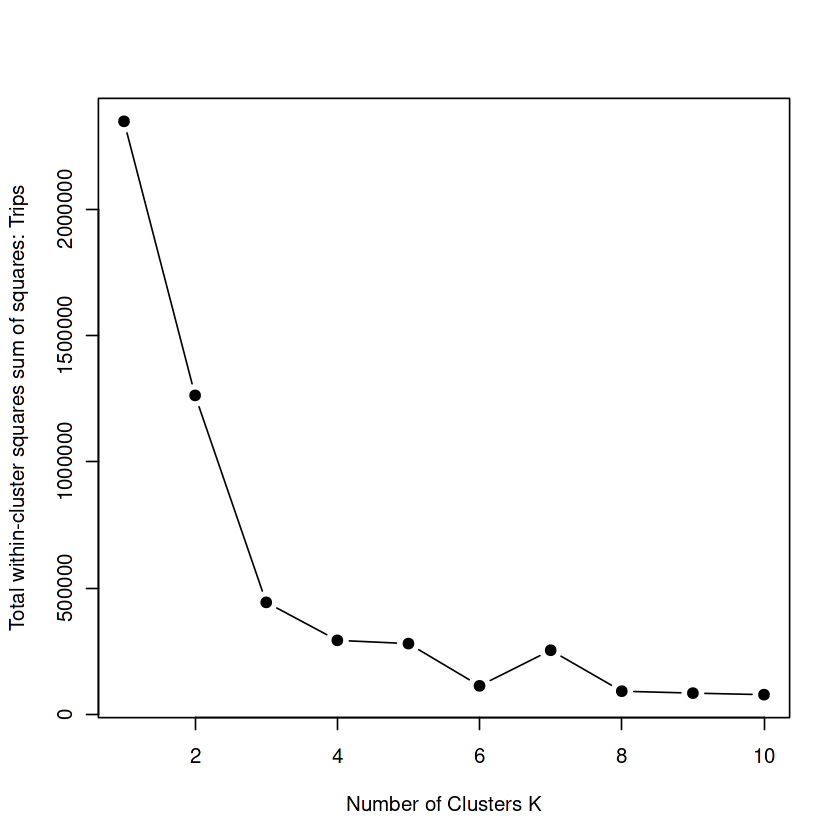

In [40]:
k.max = 10
wss = rep(NA,k.max)
nclust = list()
for(i in 1:k.max){
    driveClasses = kmeans(df,i)
    wss[i] = driveClasses$tot.withinss
    nclust[[i]] = driveClasses$size
}
plot(1:k.max,wss,type = "b", pch = 19,
    xlab = "Number of Clusters K",
    ylab = "Total within-cluster squares sum of squares: Trips")

Conclusion
* From the means we can get to know the max and mean value. We can cluster the short length and long length trips based on the means 20.26 and 174.00
* Cluster vector says the points to which the clusters belong to
* Within cluster sum of squares by cluster: is the variance. The smaller the variance the better the cluster
* From the elbow method we get to know the optimal number of k is 3